# **Altair**

In [5]:
import altair as alt
from vega_datasets import data

## Scatter

In [57]:
source = data.iris()
source.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [58]:
alt.Chart(source).mark_circle().encode(
    x = 'sepalLength',
    y = 'sepalWidth',
)

alt.Chart(...)

### List of charts:

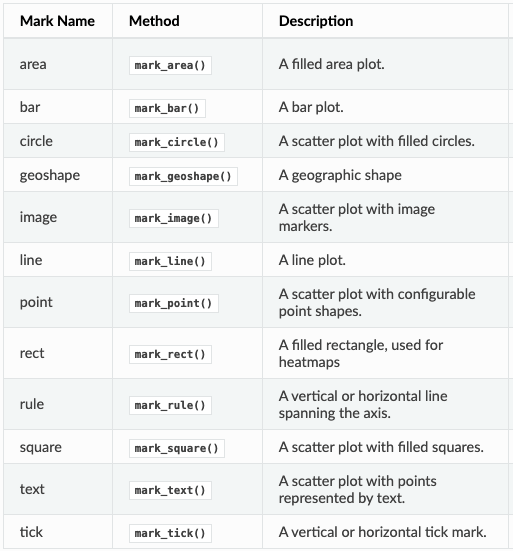

In [59]:
alt.Chart(source).mark_circle().encode(
    x = 'sepalLength',
    y = 'sepalWidth',
    color = 'species'
).properties(
    width=300,
    height=200
).interactive()

alt.Chart(...)

### Customize the titles

In [62]:
alt.Chart(source).mark_circle().encode(
    x = alt.X('sepalLength', title='Sepal Length Data'),
    y = alt.Y('sepalWidth', title = 'Sepal Width Data'),
    color = 'species'
).properties(
    width=300,
    height=200,
    title = 'Scatter plot'
).interactive()

alt.Chart(...)

### tooltip

In [38]:
alt.Chart(source).mark_circle().encode(
    x = alt.X('sepalLength', title='Sepal Length Data'),
    y = alt.Y('sepalWidth', title = 'Sepal Width Data'),
    color = 'species',
    tooltip=['sepalLength',	'sepalWidth',	'species']
).properties(
    width=300,
    height=200
).interactive()

alt.Chart(...)

### Subplots

In [60]:
p1 = alt.Chart(source).mark_circle().encode(
    x = alt.X('sepalLength', title='Sepal Length Data'),
    y = alt.Y('sepalWidth', title = 'Sepal Width Data'),
    color = 'species'
).properties(
    width=300,
    height=200
).interactive()

p2 = alt.Chart(source).mark_circle().encode(
    x = alt.X('petalLength', title='Petal Length Data'),
    y = alt.Y('petalWidth', title = 'Petal Width Data'),
    color = 'species'
).properties(
    width=300,
    height=200
).interactive()

In [61]:
p1 | p2


alt.HConcatChart(...)

## Multi Series

In [44]:
source = data.stocks()
source.head()

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45


In [51]:
lines = alt.Chart(source).mark_line().encode(
    x='date',
    y='price',
    color='symbol',
    strokeDash='symbol',
)
lines

alt.Chart(...)

## Stacked Bars

In [40]:
source = data.seattle_weather()
source.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


### Use of aggregration

In [32]:
source = data.seattle_weather()

alt.Chart(source).mark_bar().encode(
    x='month(date)',
    y= 'count()',
    color='weather'
)

alt.Chart(...)

## Interactivity

In [54]:
source = data.cars()

brush = alt.selection(type='interval')

points = alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray'))
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='Origin',
    color='Origin',
    x='count(Origin)'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

## References



1. Basics:  https://altair-viz.github.io/altair-tutorial/notebooks/02-Simple-Charts.html
3. More basics: https://huppenkothen.org/data-visualization-tutorial/13-walkthrough-altair/index.html
4. Youtube: https://www.youtube.com/watch?v=WcRWkpk0TZk
5. Gallery: https://altair-viz.github.io/gallery/





# Exercises

In [6]:
import numpy as np
import pandas as pd

## Exercise 1

Use cars dataset to plot Horsepower vs Miles_per_Gallon as a scatter plot. Use tooltip to show the values as you hover over instances.

In [8]:
source = data.cars()
source.head()

,Name,Miles_per_Gallon,Cylinders,Displacement,Horsepower,Weight_in_lbs,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,1970-01-01,USA
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,1970-01-01,USA
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,1970-01-01,USA
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,1970-01-01,USA
4,ford torino,17.0,8,302.0,140.0,3449,10.5,1970-01-01,USA


## Exercise 2

Create two plots (line, circle) for the sotcks dataset. Combine line plots with circle plots using '+'

In [ ]:
source = data.stocks()
source.head()

## Exercise 3

Investigate the Anderson-Darling test on different distributions created using numpy. Use a significance level of 5 %.

In [9]:
from numpy.random import randn
from scipy.stats import anderson

X = 5 * randn(100) + 50
anderson(X)

AndersonResult(statistic=0.4290185932554209, critical_values=array([0.555, 0.632, 0.759, 0.885, 1.053]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=50.43541588238534, scale=5.444542490748045)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

## Exercise 4

Use the t-SNE algorithm to project the digits dataset from sklearn to 2D space. visualize the results. Note: t-SNE is slow so use a protion (~500) of the dataset

In [11]:
from sklearn.datasets import load_digits
import seaborn as sns
from sklearn.manifold import TSNE

In [25]:
digits = load_digits()
digits.data.shape

(1797, 64)

In [36]:
X_embedded = TSNE(n_components=5, learning_rate='auto',method='exact',
                  init='random').fit_transform(digits.data)

In [37]:
X_embedded.shape

(1797, 5)